# Assignment

Use the "from the expert" (FTE) jupyter notebook as a starter for this assignment, and ask your instructor questions if you need help.

Use our saved churn data from week 2 with machine learning to predict if customers will churn or not, similar to what we did in the FTE:

- break up data into features and targets
- split data into train and test sets
- use at least one ML model to fit to the training data
- evaluate performance on the train and test sets: at least evaluate accuracy and compare it with the "no information rate"
- plot a confusion matrix
- write something describing how the ML algorithm could be used in a business setting
- Write a short summary of what you did with the overall process - describe any important EDA findings, data cleaning and preparation, modeling, and evaluation in your summary.

*Optional*: For an addition challenge, try the following:
- fit more ML models and compare their scores
- optimize the hyperparameters of your models
- examine more metrics such as the classification report and ROC/AUC
- plot the distribution of the probability predictions (from the `predict_proba()` function from our model) for each class (1s and 0s)

### DS process status

Here is our data science process, and where we are (#4):

**1. Business understanding**

Can we use machine learning to predict if a customer will churn before they leave?

**2. Data understanding**

Week 1 - EDA and visualization.

**3. Data preparation**

Last week - cleaning and feature engineering.


**4. Modeling**

This week.
Fit a ML model to the data.


**5. Evaluation**

This week.
Check the performance of our models and evaluate how it fits our goals from step 1.


**6. Deployment**

This week.
Describe how the model might be deployed and used at the business. Will there be an API that customer service reps can use when customers call? Should there be a system where a report gets sent to someone in customer retention or marketing with at-risk customers? We should really think about these things in the first step, although we can consider them here this time.

In [4]:
pip install -U scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/18/36/60b58b6199547b7b46be03e05508d053162fbce146639bfc65609fa49b23/scikit_learn-1.3.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 17.8 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
#import necessary packages for machine learning
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [26]:
#import in the clean dataset 
df = pd.read_csv('/Users/johnxie301/Desktop/Data Science 600/Assignment 1/churn_data_cleaned.csv',index_col='customerID')

In [27]:
#check the dataset
df.sample(10)

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,
6164-HAQTX,71,0,2,2,53.95,3888.65,0
9227-YBAXE,65,1,2,2,82.50,5215.10,0
7901-TBKJX,56,1,0,0,101.05,5594.00,0
5443-SCMKX,58,1,1,0,94.30,5610.15,0
0810-DHDBD,52,1,1,3,74.00,3877.65,0
5356-KZCKT,58,1,2,3,24.45,1513.60,0
6618-RYATB,1,1,0,1,79.55,79.55,1
9975-SKRNR,1,1,0,1,18.90,18.90,0
0523-VNGTF,52,0,0,0,50.50,2566.30,0


In [28]:
#make sure all columns are numerical data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 2775-SEFEE
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   PhoneService    7043 non-null   int64  
 2   Contract        7043 non-null   int64  
 3   PaymentMethod   7043 non-null   int64  
 4   MonthlyCharges  7043 non-null   float64
 5   TotalCharges    7043 non-null   float64
 6   Churn           7043 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 440.2+ KB


In [29]:
#break the dataset into features and targets
features = df.drop('Churn',axis=1)
target = df['Churn']

In [30]:
#Double check on the features table and target table(X and Y)
features.head(5)

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,
7590-VHVEG,1,0,0,0,29.85,29.85
5575-GNVDE,34,1,1,1,56.95,1889.50
3668-QPYBK,2,1,0,1,53.85,108.15
7795-CFOCW,45,0,1,2,42.30,1840.75
9237-HQITU,2,1,0,0,70.70,151.65


In [32]:
target.head(5)

customerID
7590-VHVEG    0
5575-GNVDE    0
3668-QPYBK    1
7795-CFOCW    0
9237-HQITU    1
Name: Churn, dtype: int64

In [33]:
#use train test split to get 'random' training set and testing set from features and targets for machine learning modeling 
x_train, x_test, y_train, y_test = train_test_split(features, target, stratify=target, random_state=42)

In [41]:
#double check if the default size is 75/25 ratio
print('The size of train features are ' ,len(x_train), 'columns. ', 'Total size is ', len(df), 'columns. ', 'Ratio is ', round(len(x_train)/len(df),2),'.')

The size of train features are  5282 columns.  Total size is  7043 columns.  Ratio is  0.75 .


In [42]:
#create a logistic regression model using the training dataset just created
lr_model_churn =LogisticRegression(max_iter=1000)
lr_model_churn.fit(X=x_train,y=y_train) 

LogisticRegression(max_iter=1000)

# Evaluation

In [43]:
#check for dataset Churn rate
df['Churn'].value_counts(normalize=True)

Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

In [45]:
#check for training model and testing model Churn rate
print(lr_model_churn.score(x_train,y_train))
print(lr_model_churn.score(x_test,y_test))


0.7949640287769785
0.7904599659284497


### Conclusion: Training model and testing model come up with a pretty close accuracy score of 0.79. I will consider this a pretty good score for a business observation. (I looked up on internet that accuracy of 70%-90% is a reasonable range for business observation in a logistic regression model)

In [46]:
#import packages for confusion matrix and graph for confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

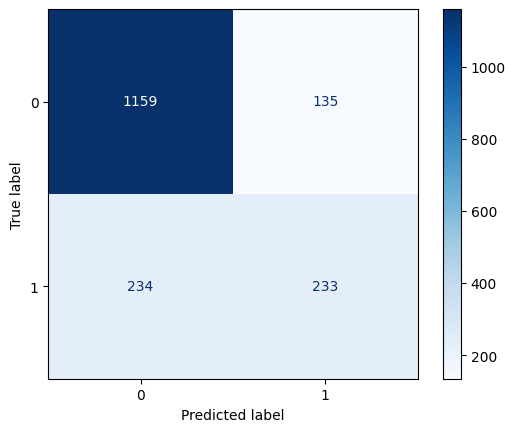

In [47]:
#gather the predictions for our test dataset
predictions = lr_model_churn.predict(x_test)

# construct the confusion matix - this retrns an array
cm = confusion_matrix(y_test, predictions, labels=lr_model_churn.classes_)

# format and display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model_churn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

#code from 'Week_3-From_the_expert-Modeling_evaluation_REVISED.ipynb'

Analysis on Confusion Matrix: This model has a higher type I error(false positive) than type II error. In this business scenario, I would like to reduce type I error to cover a larger group that has risk of Churn.

In [53]:
#take a better look into the predictions
lr_model_churn.predict_proba(x_test)[:20]

array([[0.99007534, 0.00992466],
       [0.8164002 , 0.1835998 ],
       [0.77196892, 0.22803108],
       [0.78468259, 0.21531741],
       [0.90497354, 0.09502646],
       [0.32831228, 0.67168772],
       [0.97802712, 0.02197288],
       [0.63668121, 0.36331879],
       [0.81282571, 0.18717429],
       [0.998596  , 0.001404  ],
       [0.81138928, 0.18861072],
       [0.75650953, 0.24349047],
       [0.44415327, 0.55584673],
       [0.76132572, 0.23867428],
       [0.63276903, 0.36723097],
       [0.71887981, 0.28112019],
       [0.98941567, 0.01058433],
       [0.61928109, 0.38071891],
       [0.42821585, 0.57178415],
       [0.49516189, 0.50483811]])

In [52]:
lr_model_churn.predict(x_test)[:20]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1])

In [76]:
# I tried this to make a lower type I error but it doesn't work 
predictions_lower_thresh = (lr_model_churn.predict_proba(x_test)[:, 1] > 0.2).astype('int')


In [77]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(y_test, predictions_lower_thresh))
tn, fp, fn, tp  = confusion_matrix(y_test, predictions_lower_thresh).flatten()
print(tp / (tp + fn))
print(tn,fp,fn,tp)

0.6927881885292447
0.8950749464668094
802 492 49 418


### accuracy score has been reduced.

In [60]:
lr_model_churn.coef_

array([[-5.35474942e-02, -8.49464605e-01, -1.01666296e+00,
        -1.88190595e-01,  2.74358807e-02,  2.40415653e-04]])

In [61]:
features.columns

Index(['tenure', 'PhoneService', 'Contract', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges'],
      dtype='object')

<Axes: >

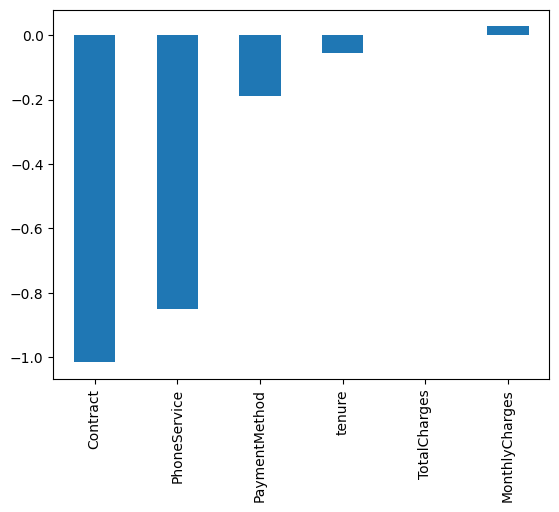

In [59]:
# let's find out the largest factor in the model!
coef_df = pd.DataFrame(data=lr_model_churn.coef_,columns= features.columns)
coef_df.T.sort_values(by=0).plot.bar(legend=False)


## Trying other ML models('RandomForestClassifier' & 'GradientBoostingClassifier')

In [88]:
#import model and fit in training dataset into the model. For better comparison, use the same random_state to get the same random training set.
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

rf_model_churn = RandomForestClassifier(max_depth=5, n_jobs=-1, random_state=42)
gb_model_churn = GradientBoostingClassifier(max_depth=4, random_state=42)

rf_model_churn.fit(x_train, y_train)
gb_model_churn.fit(x_train, y_train)

#code from 'Week_3-From_the_expert-Modeling_evaluation_REVISED.ipynb'

GradientBoostingClassifier(max_depth=4, random_state=42)

In [89]:
# accuracies of random forest model
print(rf_model_churn.score(x_train, y_train))
print(rf_model_churn.score(x_test, y_test))


0.8044301400984476
0.7978421351504826


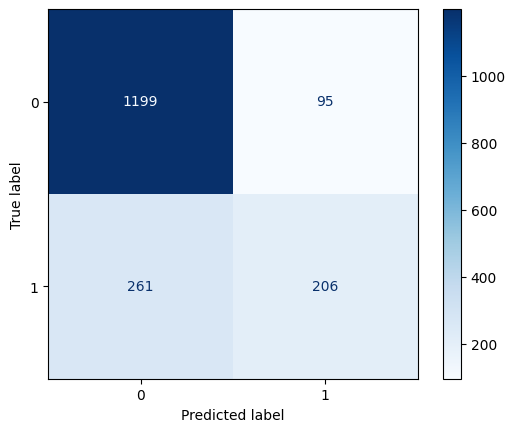

In [90]:
#gather the predictions for our test dataset
predictions = rf_model_churn.predict(x_test)

# construct the confusion matix - this retrns an array
cm = confusion_matrix(y_test, predictions, labels=rf_model_churn.classes_)

# format and display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model_churn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

#code from 'Week_3-From_the_expert-Modeling_evaluation_REVISED.ipynb'

In [84]:
# accuracies of GradientBoosting model
print(gb_model.score(x_train, y_train))
print(gb_model.score(x_test, y_test))

0.836804240817872
0.787052810902896


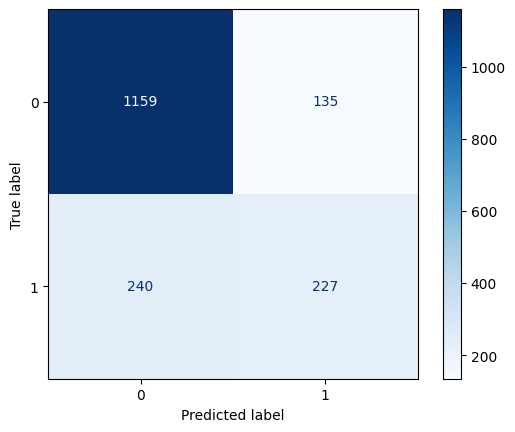

In [91]:
#gather the predictions for our test dataset
predictions = gb_model_churn.predict(x_test)

# construct the confusion matix - this retrns an array
cm = confusion_matrix(y_test, predictions, labels=gb_model_churn.classes_)

# format and display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model_churn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

#code from 'Week_3-From_the_expert-Modeling_evaluation_REVISED.ipynb'

It appears that all the models made a good prediction on not churn values. I should try to change the training size to see if it helps to create a model with less type I errors.

In [93]:
# a new training and testing size with the same random samples
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(features, target, stratify=target, random_state=42,test_size=0.2)


In [97]:
# double check the training size
len(x_train_1)

5634

In [98]:
#applying the logistic regression model to new testing size
lr_model_2 = LogisticRegression(max_iter=1000)
lr_model_2.fit(x_train_1, y_train_1)

LogisticRegression(max_iter=1000)

In [99]:
print(lr_model_2.score(x_train, y_train))
print(lr_model_2.score(x_test, y_test))

0.793260128739114
0.7887563884156729


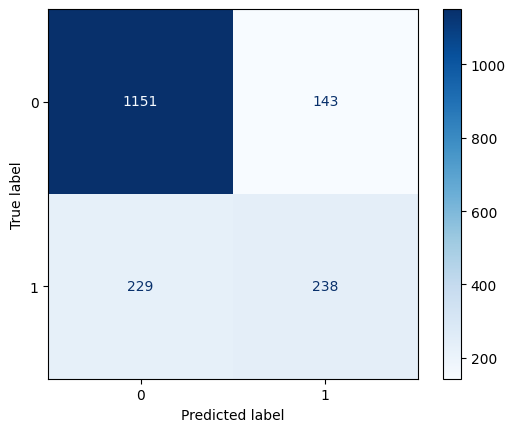

In [100]:
#gather the predictions for our test dataset
predictions = lr_model_2.predict(x_test)

# construct the confusion matix - this retrns an array
cm = confusion_matrix(y_test, predictions, labels=lr_model_2.classes_)

# format and display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model_churn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

#code from 'Week_3-From_the_expert-Modeling_evaluation_REVISED.ipynb'

### Conclusion: Changing the testing size to 0.2 bearly made any changes on either the accuracy score or False Positive numbers. 

In [131]:
# Try again with increasing testing size
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(features, target, stratify=target, random_state=42,test_size=0.3)

In [132]:
lr_model_3 = LogisticRegression(max_iter=1000)
lr_model_3.fit(x_train_2, y_train_2)

LogisticRegression(max_iter=1000)

In [133]:
print(lr_model_3.score(x_train, y_train))
print(lr_model_3.score(x_test, y_test))

0.7953426732298372
0.7887563884156729


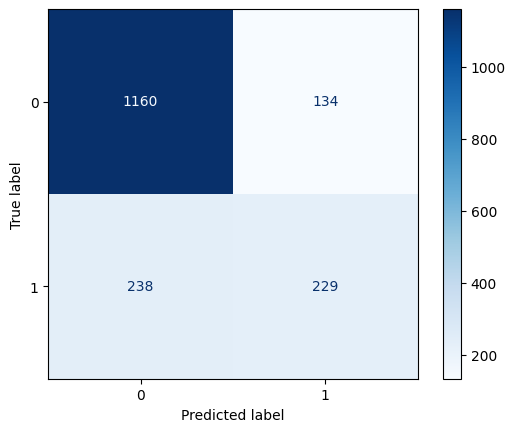

In [134]:
#gather the predictions for our test dataset
predictions = lr_model_3.predict(x_test)

# construct the confusion matix - this retrns an array
cm = confusion_matrix(y_test, predictions, labels=lr_model_3.classes_)

# format and display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model_churn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

#code from 'Week_3-From_the_expert-Modeling_evaluation_REVISED.ipynb'

### Conclusion: Changing the testing size to 0.3 does not seem to make any differences, only the training accuracy has slightly increased. To achieve my goal on reduce false positive number, my best option is probably increasae sample size. 

# 6. Deployment

Write a small description of how we might use this ML algorithm in a business setting.

### By using logistic regression we can make a good prediction on customer's risk of churn and put in action ahead of time before we lose the customer. If we know there is a risk of churn for this customer, we can dive deep into the dataset and find out the potential causes of churn and maybe figure out a way to keep the customers. Whether it is to give better deals or provide more services. In additon, we can find the biggest factor of churn risk and create strategies based on that.

# Summary

### For the last three weeks, I was able to utilize the Churn dataset to explore the insights from the data using python. I am grateful to go through the procedures of creating Machine learning models and think like a data scientist.

### In the first phase, we read the business background to have a good understanding on what do we expect from the dataset to help with the business. The business goals are to predict the Churn targets and deploy strategies to reduce churn risk. 

### Thus, we first did some exploratory data analysis by creating graphs to visualize the possibly correlations between different columns. First, I used value_counts method and concating find out that month-to-month and electronic check are the most common combinations of payment method and contract. Then I found they each has a churn pattern as the total charges go up using histgram. I made my assumption on for the people with month-to-month contract and electronic payment method: The higher total charges they have, they are less likely to churn. Unforturnately at that point I did not pay attention to tenure correlation with churn. 

### Afterwards, we started to clean the dataset to get it ready for machine learning phase. First I checked for outliers. Outliers does not occur in this data set. The dataset is a normal distributed dataset. Then I checked for nulls and missing values. There was 11 null values in total charges column. They did not have total charges due to tenure of 0. Therefore, I used mothly charges to replace null values instead. I was later learned that I could use the mean to replace null values since this is a normally distributed column. I also learned 'apply()' to quickly replace all 11 null values with values on the same row. Finally, I replace all categorical columns with numeric values to get it prepared for machine learning model and saved as a new csv file. 

### Last but no least, I applied the machine learning models with the cleaned dataset. I have tried all three models for classifiers. Unfortunately, I did not find the best fit that reduces false postive predictions. I have tried test size of 0.1,0.2,0.3,0.95. Only testing size of 0.95 has a better result. However, the training size was too small to be trusted. The best way to improve I can currently think of will be increasing sample size to have a better vision. But the models gives a solid 80% accuracy on both training and testing scores. The biggest factor was contract and phone service. I was surprised by how much phone service can affect a customer's decision on opting out. I definitely need to improve my models as it is currently not the best fit for the business. I will miss almost half of the customers that will actually going to churn. However, it would definitely save the company some money if they want to give out secret deals(incentives) to customers that are having risk of churn with a 80% accuracy.



